In [1]:
import numpy as np
import cv2
from skimage.feature import hog
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## Vehicle Detection
Roughly speaking we can say that detection = region proposal + classification.  We first identify (many) regions where the object might be located, and then use a classifier on each region to see if the object is indeed in that window.  

We will first look at the region proposal step.  In this project, we will use the most naive approach to region proposal---we will simply move a sliding window over the entire image, looking at all locations where a car might be.

### Regions

(720, 1280, 3)


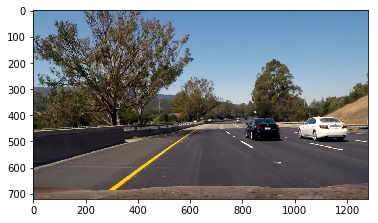

In [2]:
file_path = './test_images/'
file = 'test6.jpg'
img = cv2.imread(file_path+file)
plt.imshow(img[:,:,::-1])
print(img.shape)

We will crop out the top portion of the image to remove the sky. We remove the top 400 rows of the image, and the bottom 45 rows to remove the hood of the car.

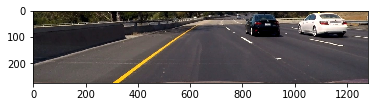

In [4]:
crop = img[400:675,:,:]
plt.imshow(crop[:,:,::-1])

First we make sure we know how to draw a rectangle.

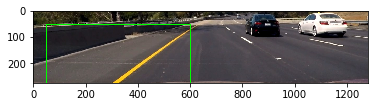

In [5]:
crop_copy = crop.copy()
cv2.rectangle(crop_copy,(50,50),(600,300),(0,255,0),2)
plt.imshow(crop_copy[:,:,::-1])

Now let's draw rectangles in a loop.

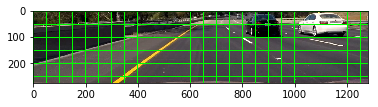

In [6]:
crop_copy = crop.copy()
height = 100
width = 100
stride_y = int(height/2)
stride_x = int(width/2)
for top_y in range(0,crop.shape[0],stride_y):
    for top_x in range(0,crop.shape[1],stride_x):
        cv2.rectangle(crop_copy,(top_x,top_y),(top_x+width,top_y+height),(0,255,0),2)
plt.imshow(crop_copy[:,:,::-1])
plt.savefig('regions')

We will try this layout of rectangles to start with.  This gives us 150 rectangles to search through, and seems like it would be a fine enough grid to localize the cars.

### Classification
Now we move into the problem of determining if a region contains a car or not.  We will use the provided vehicle/non-vehicle datasets to train our classifier.  First, let's look at some examples from the dataset.

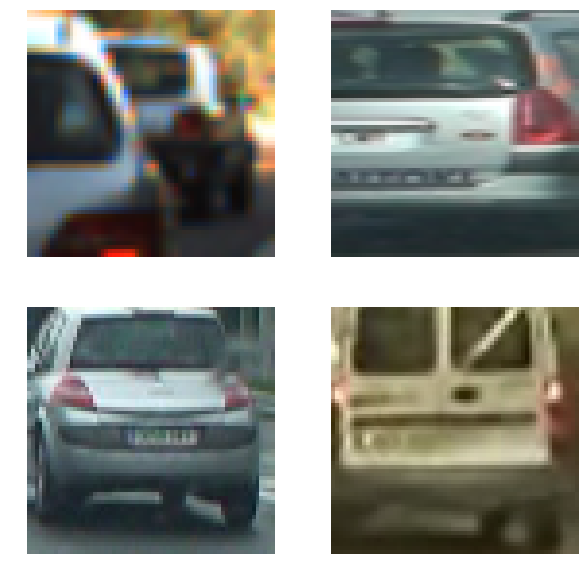

In [7]:
path = './example_images/cars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    i = i+1
plt.savefig('car_examples.png')

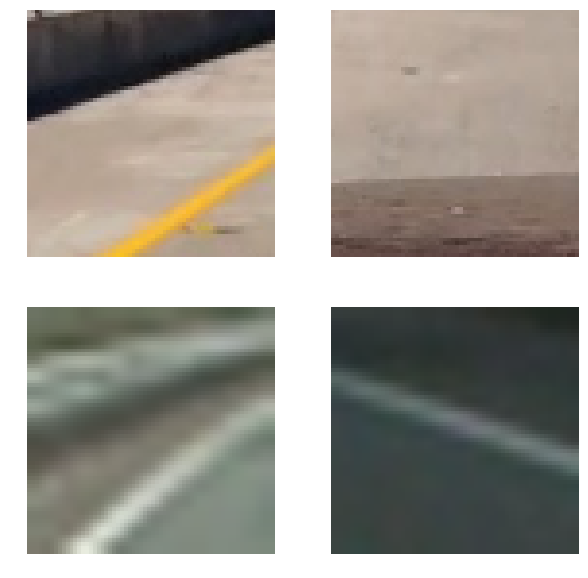

In [8]:
path = './example_images/noncars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    i = i+1
plt.savefig('noncar_examples.png')

## HOG on grayscale

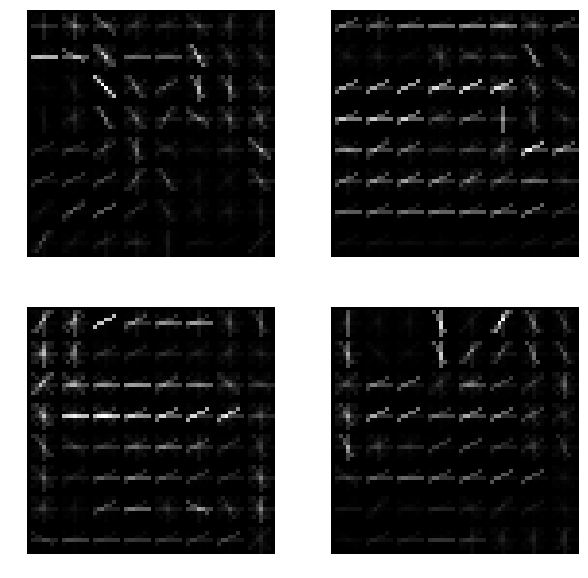

In [9]:
path = './example_images/cars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    gray = cv2.imread(file,0)
    features, hog_image = hog(gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

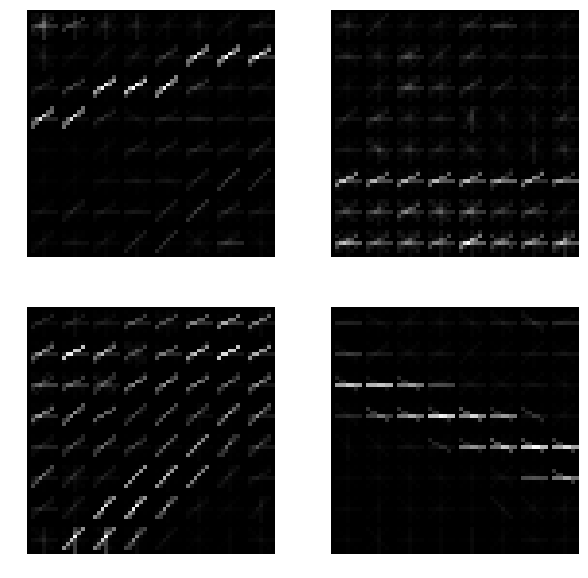

In [10]:
path = './example_images/noncars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    gray = cv2.imread(file,0)
    features, hog_image = hog(gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

### HOG on L channel of HLS

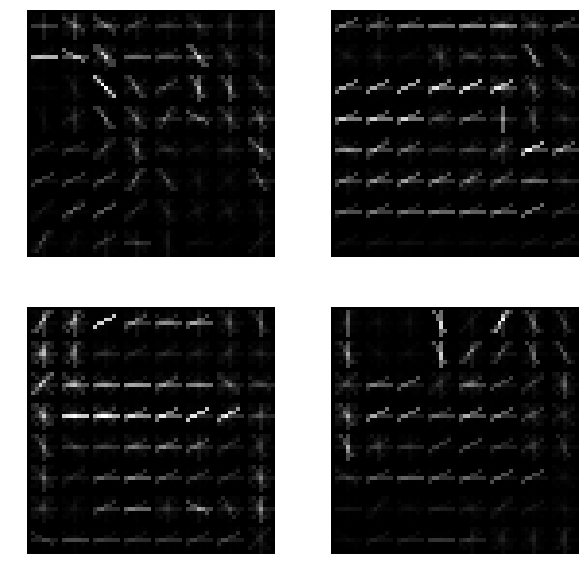

In [11]:
path = './example_images/cars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    L = hls[:,:,1]
    features, hog_image = hog(L, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

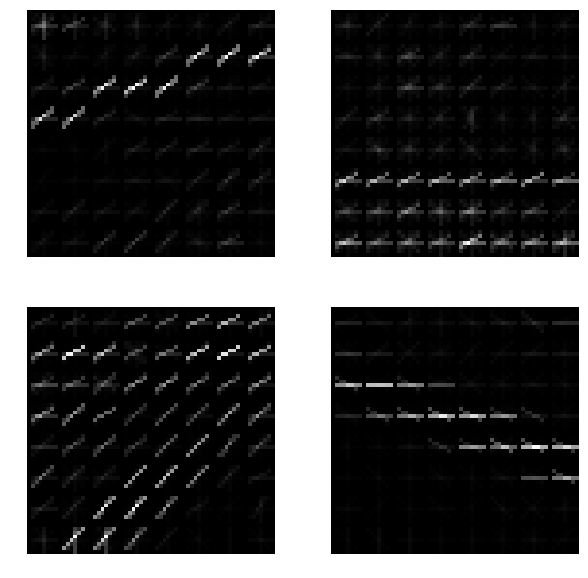

In [12]:
path = './example_images/noncars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    L = hls[:,:,1]
    features, hog_image = hog(L, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

### HOG on S channel of HLS

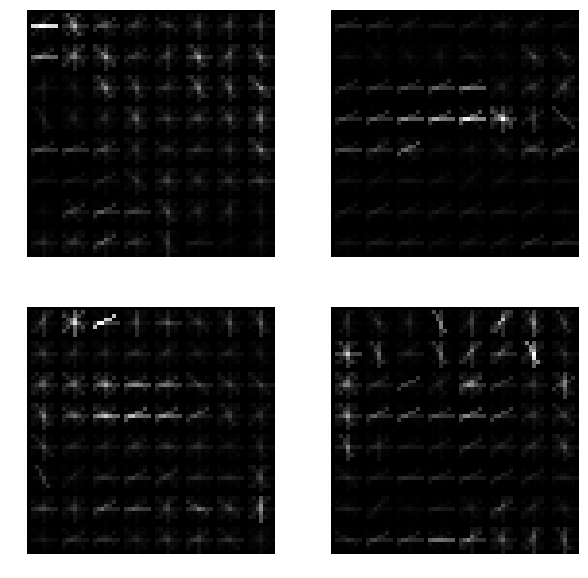

In [13]:
path = './example_images/cars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    S = hls[:,:,2]
    features, hog_image = hog(S, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

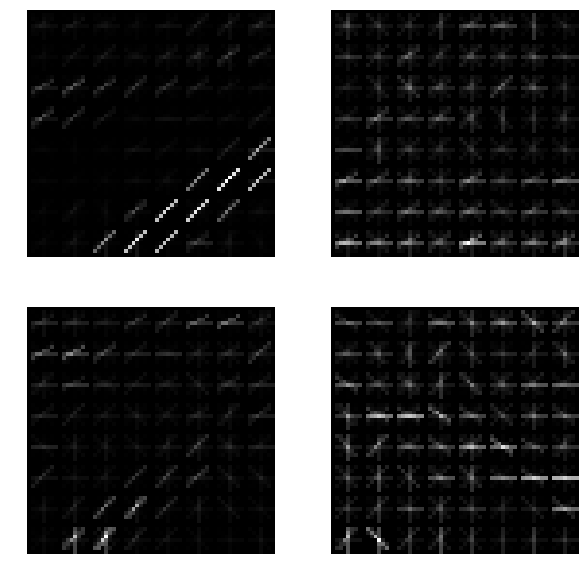

In [14]:
path = './example_images/noncars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    S = hls[:,:,2]
    features, hog_image = hog(S, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.imshow(hog_image, cmap = 'gray')
    i = i+1

## color histogram

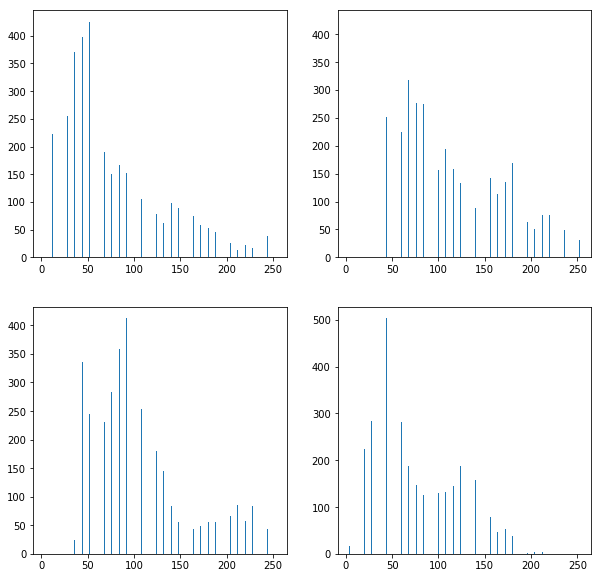

In [15]:
path = './example_images/cars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hist = np.histogram(img[:,:,0],bins = 32, range = (0,256))
    bin_edges = hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    plt.subplot(2,2,i)
    plt.bar(bin_centers, hist[0])
    i = i+1

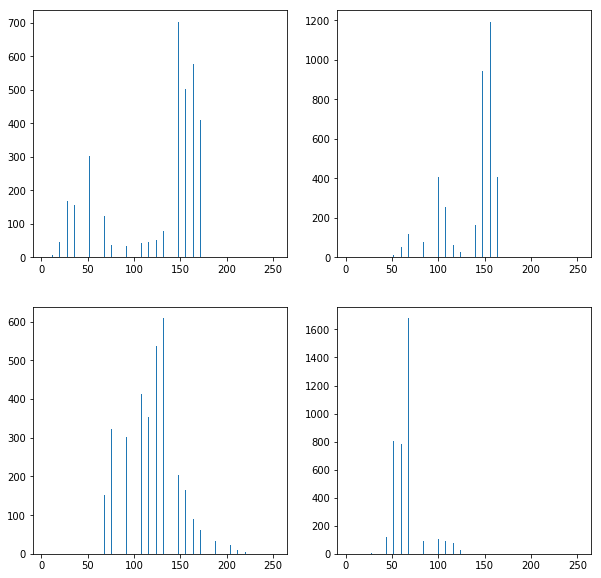

In [16]:
path = './example_images/noncars/'
plt.figure(figsize = (10,10))
i = 1
for file in glob.glob(os.path.join(path,'*.png')):
    img = cv2.imread(file)
    hist = np.histogram(img[:,:,0],bins = 32, range = (0,256))
    bin_edges = hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    plt.subplot(2,2,i)
    plt.bar(bin_centers, hist[0])
    i = i+1

### Full pipeline on an image

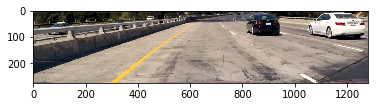

In [17]:
file_path = './test_images/'
file = 'test1.jpg'
img = cv2.imread(file_path+file)
crop = img[400:675,:,:]
plt.imshow(crop[:,:,::-1])

Rather than performing all operations on each window, we want to perform the operations on the entire image, then select the relevant portions.  As the classifier is trained on images of size 64-by-64, but now we are using windows of size 128-by-128, we need to properly scale the image in order to get the same types of features.  

We will actually need to deal with two sizes.  For the spatial binning, we used a 32-by-32 size image.  This is a factor of 4 reduction.  For the color histogram and HOG we used a 64-by-64 size image which is a factor of 2 size reduction.

In [19]:
from skimage.util import view_as_windows
h,w = crop.shape[:2]
fac2 = cv2.resize(crop,(int(w/2),int(h/2)))
fac4 = cv2.resize(crop,(int(w/4),int(h/4)))
hls = cv2.cvtColor(fac2,cv2.COLOR_BGR2HLS)
featL = hog(hls[:,:,1], orientations=10, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                visualise=False, feature_vector=False)
featS = hog(hls[:,:,2], orientations=10, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                visualise=False, feature_vector=False)
size = 64
stride = int(64/2)
A = view_as_windows(fac2,(size,size,3),stride)
B = view_as_windows(fac4, (32,32,3),16)
C = view_as_windows(hls,(size,size,3),stride)

In [20]:
featL.shape

(16, 79, 2, 2, 10)

In [21]:
def make_colorhist(channel):
    hist = np.histogram(channel, bins = 32, range = (0,256))
    return hist[0].reshape((1,-1))

In [22]:
X = np.zeros((57,7088))
count = 0
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        # from A we get the color histogram
        window = A[i,j,0,:,:,:]
        Bcolor = make_colorhist(window[:,:,0])
        Gcolor = make_colorhist(window[:,:,1])
        Rcolor = make_colorhist(window[:,:,2])
        window2 = B[i,j,0,:,:,:]
        pixels = window2.reshape(1,-1)
        LHOG = featL[4*i:4*i+7,4*j:4*j+7,:,:,:].reshape(1,-1)
        SHOG = featS[4*i:4*i+7,4*j:4*j+7,:,:,:].reshape(1,-1)
        features = np.hstack((pixels,LHOG,SHOG,Bcolor,Gcolor,Rcolor))
        X[count]=features
        count = count + 1

In [23]:
from sklearn.externals import joblib
clf = joblib.load('clf.pkl')
X_scaler = joblib.load('scaler.pkl')

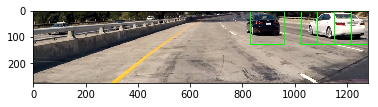

In [24]:
crop_copy = crop.copy()
X_scaled = X_scaler.transform(X)
y = clf.predict(X_scaled)
y = y.reshape((3,19))
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        if (y[i,j] == 1):
            cv2.rectangle(crop_copy,(j*64,i*64),(j*64+128,i*64+128),(0,255,0),2)
plt.imshow(crop_copy[:,:,::-1])
plt.savefig('pipeline_image1.png')